In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vorpy as vp
from stdpaths import linepath, ringpath

/home/crashoverride/miniforge3/envs/2024_05_work/lib/python3.12/site-packages/juliacall/__init__.py:237: UserWarning: Julia was started with multiple threads but multithreading support is experimental in JuliaCall. It is recommended to restart Python with the environment variable PYTHON_JULIACALL_HANDLE_SIGNALS=yes set, otherwise you may experience segfaults or other crashes. Note however that this interferes with Python's own signal handling, so for example Ctrl-C will not raise KeyboardInterrupt. See https://juliapy.github.io/PythonCall.jl/stable/faq/#Is-PythonCall/JuliaCall-thread-safe? for further information. You can suppress this warning by setting PYTHON_JULIACALL_HANDLE_SIGNALS=no.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/Dropbox/code/vorpy/julia`


In [2]:
THREADED = False

In [3]:
DTYP = np.float64
LINELENGTH = 10_000
NUMSEGMENTS = 100

vor = linepath(LINELENGTH, NUMSEGMENTS, DTYP, 1e-1, 1)

NUMFPS = 100
fps = np.zeros((NUMFPS, 3), dtype=DTYP)
fps[:, 1] = np.linspace(1e-3, 60, num=NUMFPS, dtype=DTYP)

# CRAD = DTYP(5)
# CIRC = DTYP(1)

# vppF = np.array([LINELENGTH/2, 0.0, 0.0], dtype=DTYP)
# vppI = -vppF.copy()
# vpps = np.linspace(vppF, vppI, NUMSEGMENTS+1, dtype=DTYP)
# crads = np.ones(NUMSEGMENTS+1, dtype=DTYP) * DTYP(CRAD)
# circs = np.ones(NUMSEGMENTS+1, dtype=DTYP) * DTYP(CIRC)

In [4]:
velnum = vor.velfp(fps, 1e-6, 1e-1, THREADED)
velana = vor.velfp_lamboseen(fps)

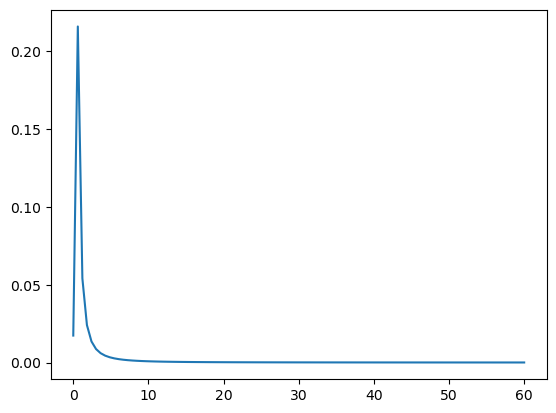

In [5]:
plt.plot(fps[:, 1], np.abs(-velnum[:, 2] - velana))
plt.show()

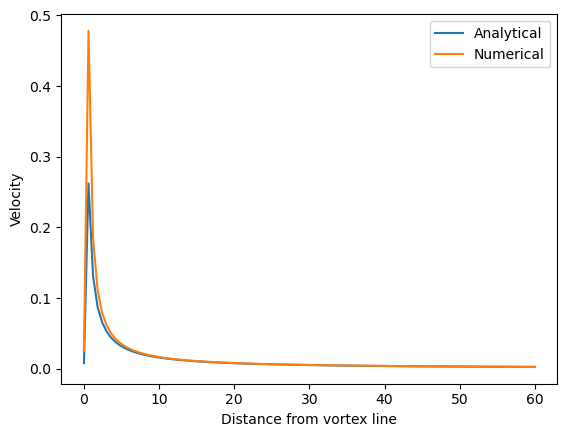

In [6]:
plt.plot(fps[:, 1], velana, label='Analytical')
plt.plot(fps[:, 1], -velnum[:, 2], label='Numerical')
plt.xlabel('Distance from vortex line')
plt.ylabel('Velocity')
plt.legend()
plt.show()

In [7]:
DTYP = np.float64
RADIUS = 1
crad = DTYP(RADIUS * 1e-3)
CIRC = 1
NUMSEGMENTS = 10

vpring = ringpath(RADIUS, NUMSEGMENTS, DTYP, crad, CIRC)

In [8]:
velring = vpring.vel(1e-6, 1e-4, THREADED)

In [9]:
display(velring)

array([[0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037],
       [0.        , 0.        , 0.44626037]])

In [10]:
print(velring[0, 2])
print(vpring.vel_onring_infthin)
print((vpring.vel_onring_infthin * 1e0) - velring[0, 2])

0.44626037002367175
0.6431947201323392
0.1969343501086675


0.0 0.44626037002402863
0.1 0.44626037002524016
0.2 0.44626037002454316
0.30000000000000004 0.446260370025548
0.4 0.446260370024869
0.5 0.4462603700251956
0.6000000000000001 0.4462603700255518
0.7000000000000001 0.44626037002491553
0.8 0.4462603700250994
0.9 0.44626037002547625
[[-2.86264417e-13 -4.35726552e-14  4.46260370e-01]
 [-3.44832984e-13 -5.89447778e-13  4.46260370e-01]
 [-4.57975923e-13 -4.80150780e-13  4.46260370e-01]
 [-2.48738228e-13 -2.60656993e-13  4.46260370e-01]
 [-1.72331701e-13  4.15047574e-14  4.46260370e-01]
 [-3.05389009e-13 -5.44083055e-14  4.46260370e-01]
 [-4.24769352e-13 -3.28641765e-13  4.46260370e-01]
 [-1.53243030e-13 -5.68686286e-14  4.46260370e-01]
 [-5.00915723e-13  3.22542592e-13  4.46260370e-01]
 [ 3.89109866e-13  1.71833683e-14  4.46260370e-01]
 [-2.86264417e-13 -4.35726552e-14  4.46260370e-01]]
[[-3.90453311e-13 -2.52125898e-13  4.46260370e-01]
 [-2.05710681e-14  2.13254011e-13  4.46260370e-01]
 [-8.72285494e-14 -2.32284921e-13  4.46260370e-01]
 [-1.5

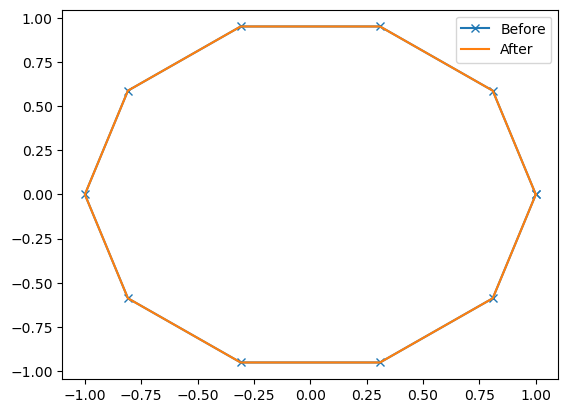

In [12]:
epsilon = 1e-1
vppsbefore = vpring.vpps.copy()
velringbefore = vpring.vel(1e-6, 1e-4, THREADED)
for tstep in np.arange(0, 1, 0.1):
    velring = vpring.vel(1e-6, 1e-4, THREADED)
    vpring.vpps += epsilon * velring
    print(tstep, velring[0, 2])


vppsafter = vpring.vpps.copy()
velringafter = vpring.vel(1e-6, 1e-4, THREADED)
print(velringbefore)
print(velringafter)
print(velringafter - velringbefore)

plt.plot(vppsbefore[:, 0], vppsbefore[:, 1], 'x-', label='Before')
plt.plot(vppsafter[:, 0], vppsafter[:, 1], label='After')
plt.legend()
plt.show()